In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import dataset

Found 3369 files belonging to 2 classes.
Metal device set to: Apple M1 Pro


2022-09-21 22:20:01.782019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-21 22:20:01.782175: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
epochs = 50

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3,) + dataset.IMG_SIZE
else:
    input_shape = dataset.IMG_SIZE + (3,)
    
model = Sequential([tf.keras.layers.Rescaling(1. / 255, input_shape=dataset.IMG_SIZE + (3,))])
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

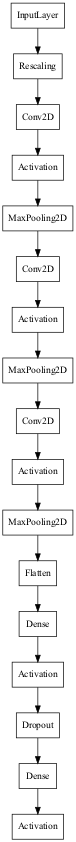

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model.png', dpi=50 , show_shapes=False, show_layer_names=False)

In [ ]:
# model.fit(
#     dataset.train_dataset,
#     epochs=epochs,
#     validation_data=dataset.validation_dataset,
#     )
# model.save('results/Building powerful image classification models using very little data/Building powerful image '
#            'classification models using very little data.h5')

model = tf.keras.models.load_model('results/Building powerful image classification models using very little data/Building powerful image classification models using very little data.h5')

In [10]:
# model.fit(
#     dataset.train_dataset,
#     epochs=epochs,
#     validation_data=dataset.validation_dataset,
#     )
# model.save('results/Building powerful image classification models using very little data/Building powerful image '
#            'classification models using very little data.h5')

model = tf.keras.models.load_model('results/Building powerful image classification models using very little data/Building powerful image classification models using very little data.h5')

In [19]:
import os

img = tf.keras.preprocessing.image.load_img(os.path.join(os.getenv('TEST_ONE'), 'img.png'), target_size=input_shape)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
# score = predictions[0]
# print(
#     "This image is %.2f percent bad and %.2f percent good."
#     % (100 * (1 - score), 100 * score)
# )

In [22]:
dataset.train_dataset.class_indices


AttributeError: 'PrefetchDataset' object has no attribute 'class_indices'